In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading and Preparing

In [274]:
data = pd.read_csv('customer_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs (cost of good sales,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3


In [276]:
data.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [278]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs (cost of good sales,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,10.00000


In [280]:
data=data.dropna()
data.shape

(1000, 15)

In [282]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs (cost of good sales', 'Rating'],
      dtype='object')

In [284]:
data = data.rename(columns={'cogs (cost of good sales': 'Cost of good sales'})   
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Cost of good sales', 'Rating'],
      dtype='object')

In [286]:
data = data.drop_duplicates()
data.shape

(1000, 15)

Inter Quantile Range

In [289]:
IQR_data = data.drop(columns=['Invoice ID','Branch','City','Customer type','Gender','Product line','Date','Payment','Date','Time','Rating'])
IQR_data

,Unit price,Quantity,Tax 5%,Total,Cost of good sales
0,74.69,7,26.1415,548.9715,522.83
1,15.28,5,3.8200,80.2200,76.40
2,46.33,7,16.2155,340.5255,324.31
3,58.22,8,23.2880,489.0480,465.76
4,86.31,7,30.2085,634.3785,604.17
...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35
996,97.38,10,48.6900,1022.4900,973.80
997,31.84,1,1.5920,33.4320,31.84
998,65.82,1,3.2910,69.1110,65.82


In [291]:
Q1 = IQR_data.quantile(0.25)
Q3 = IQR_data.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(lower_bound)
print(upper_bound)


Unit price            -34.715000
Quantity               -4.500000
Tax 5%                -18.855688
Total                -395.969438
Cost of good sales   -377.113750
dtype: float64
Unit price            145.525000
Quantity               15.500000
Tax 5%                 47.225813
Total                 991.742062
Cost of good sales    944.516250
dtype: float64


In [293]:
data = data[~((IQR_data < lower_bound) | (IQR_data > upper_bound)).any(axis=1)]
data.shape

(991, 15)

# Feature Engineering

In [296]:
data['Date']= pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'],format='%H:%M')

In [298]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hours'] = data['Time'].dt.hour
data['Minutes'] = data['Time'].dt.minute

def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Autumn"

data["Season"] = data["Month"].apply(get_season)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,Cost of good sales,Rating,Year,Month,Day,Hours,Minutes,Season
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1900-01-01 13:08:00,Ewallet,522.83,9.1,2019,1,5,13,8,Winter
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,1900-01-01 10:29:00,Cash,76.40,9.6,2019,3,8,10,29,Spring
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,1900-01-01 13:23:00,Credit card,324.31,7.4,2019,3,3,13,23,Spring
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,1900-01-01 20:33:00,Ewallet,465.76,8.4,2019,1,27,20,33,Winter
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,1900-01-01 10:37:00,Ewallet,604.17,5.3,2019,2,8,10,37,Winter


In [300]:
print(data.dtypes)

Invoice ID                    object
Branch                        object
City                          object
Customer type                 object
Gender                        object
Product line                  object
Unit price                   float64
Quantity                       int64
Tax 5%                       float64
Total                        float64
Date                  datetime64[ns]
Time                  datetime64[ns]
Payment                       object
Cost of good sales           float64
Rating                       float64
Year                           int32
Month                          int32
Day                            int32
Hours                          int32
Minutes                        int32
Season                        object
dtype: object


In [302]:
x = data.drop(columns=['Invoice ID','Branch','Date','Payment','Rating','Time'])
x.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Cost of good sales', 'Year', 'Month',
       'Day', 'Hours', 'Minutes', 'Season'],
      dtype='object')

In [304]:
y = data.iloc[:,14]
y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
994    5.9
995    6.2
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 991, dtype: float64

In [306]:
from sklearn import preprocessing as pre
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [308]:
ordinal= pre.OrdinalEncoder()
scaler = pre.StandardScaler()
transformx = make_column_transformer((ordinal,['City','Customer type','Gender','Product line','Season']),
                                    (scaler,['Unit price','Quantity','Tax 5%','Total','Cost of good sales','Year', 'Month', 'Day','Hours', 'Minutes']))
processedx = transformx.fit_transform(x)

In [310]:
transformx

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['City', 'Customer type', 'Gender',
                                  'Product line', 'Season']),
                                ('standardscaler', StandardScaler(),
                                 ['Unit price', 'Quantity', 'Tax 5%', 'Total',
                                  'Cost of good sales', 'Year', 'Month', 'Day',
                                  'Hours', 'Minutes'])])

In [312]:
processedx

array([[ 2.        ,  0.        ,  0.        , ..., -1.1818761 ,
        -0.59809525, -1.31047154],
       [ 1.        ,  1.        ,  0.        , ..., -0.83692051,
        -1.53791406, -0.06601691],
       [ 2.        ,  1.        ,  1.        , ..., -1.4118465 ,
        -0.59809525, -0.42157538],
       ...,
       [ 2.        ,  0.        ,  1.        , ..., -0.72193531,
        -0.59809525, -0.48083512],
       [ 2.        ,  1.        ,  1.        , ...,  0.77287225,
         0.02845062,  0.17102207],
       [ 2.        ,  0.        ,  0.        , ...,  0.31293146,
        -0.59809525, -0.12527665]])

# K Fold Validation

In [315]:
from sklearn.linear_model import LinearRegression

In [317]:
model = LinearRegression() #fit_intercept=True, copy_X=False, n_jobs=3, positive=False

In [319]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [321]:


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
mae_list, mse_list, rmse_list, r2_list = [], [], [], []
y = y.to_numpy()
for train_index, test_index in kf.split(processedx):
    # Split
    X_train, X_test = processedx[train_index], processedx[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# Print Results
print("Cross-Validation Results (Regression):")
print(f"MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"MSE: {np.mean(mse_list):.3f} ± {np.std(mse_list):.3f}")
print(f"RMSE: {np.mean(rmse_list):.3f} ± {np.std(rmse_list):.3f}")
print(f"R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

Cross-Validation Results (Regression):
MAE: 1.487 ± 0.042
MSE: 3.006 ± 0.123
RMSE: 1.734 ± 0.036
R²: -0.025 ± 0.022


# Hyper Parameter Tuning

In [324]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'fit_intercept': [True, False],  
    'copy_X': [True, False],        
    'n_jobs': [None, 1, 2, 3, -1],   
    'positive': [True, False]       
}

cross_validated_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=50, random_state=42, n_jobs=-1, cv=5)


In [349]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(processedx, y, test_size=0.3)
cross_validated_model.fit(trainx, trainy)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, 1, 2, 3, -1],
                                        'positive': [True, False]},
                   random_state=42)

In [351]:
print("Best Parameters:", cross_validated_model.best_params_)
print("Best Score:", cross_validated_model.best_score_)
predictedy = cross_validated_model .predict(testx)

Best Parameters: {'positive': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}
Best Score: -0.014465481906426625


# Evaluation

In [354]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

In [356]:
error_mse = mean_absolute_error(testy,predictedy)
error_rmse = root_mean_squared_error(testy,predictedy)
print(error_mse)
print(error_rmse)

1.4896739173687183
1.7365903027858418


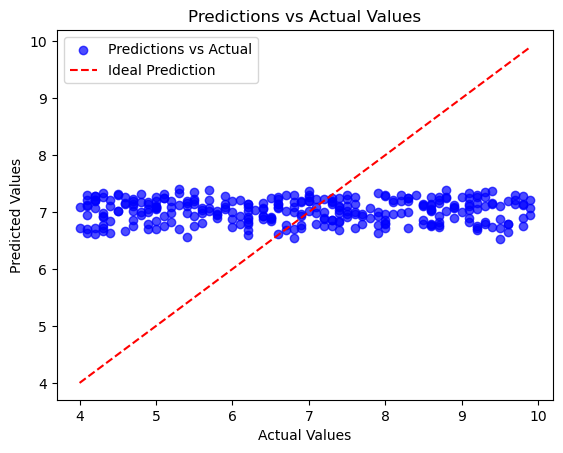

In [358]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(testy, predictedy, color='blue', label='Predictions vs Actual', alpha=0.7)
plt.plot([min(testy), max(testy)], [min(testy), max(testy)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()
